In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data_df=pd.read_csv('newsCorpora.csv',sep='\t',header=None)
data_df.drop(data_df.columns[0], axis=1, inplace=True)
rows = list(range(len(data_df.index)))
random.shuffle(rows)
data_df = data_df.iloc[rows]
data_df = data_df.reset_index(drop=True)
data_df.head()

,1,2,3,4,5,6,7
0,Crude oil prices mixed in Asia trade,http://www.thehindubusinessline.com/markets/co...,Hindu Business Line,b,ddeQnoQqipb792MMTE5lQPdGPQTDM,www.thehindubusinessline.com,1396067015761
1,Amazon launches shopping via Twitter,http://www.thebookseller.com/news/amazon-launc...,The Bookseller,b,dO5MVKq5OUcLRtMqUbxpAnmdaIkJM,www.thebookseller.com,1399371280814
2,E-Cigarettes May Not Help Smokers Quit,http://www.rttnews.com/2291816/e-cigarettes-ma...,RTT News,m,dPNqfj9B3-OuLSMwrQqIf-pNuYhWM,www.rttnews.com,1395780154077
3,Mortgage Rates Higher as Pre-ECB Volatility Ra...,http://www.mortgagenewsdaily.com/consumer_rate...,Mortgage News Daily,b,dLLmuV7pAbIxUoM_GdCJpbx_o3WvM,www.mortgagenewsdaily.com,1401882959590
4,Best dressed: Men's Wearhouse to buy Jos. A. B...,http://www.10news.com/news/best-dressed-mens-w...,10News,b,do6Vg-oWU1TOTeMhVmlSXEHyzSaoM,www.10news.com,1394581531954


In [3]:
data_df.iloc[:, 3] = data_df.iloc[:, 3].astype('category')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   1       422419 non-null  object  
 1   2       422419 non-null  object  
 2   3       422417 non-null  object  
 3   4       422419 non-null  category
 4   5       422419 non-null  object  
 5   6       422419 non-null  object  
 6   7       422419 non-null  int64   
dtypes: category(1), int64(1), object(5)
memory usage: 19.7+ MB


Text(0.5, 1.0, 'Distribution of news categories')

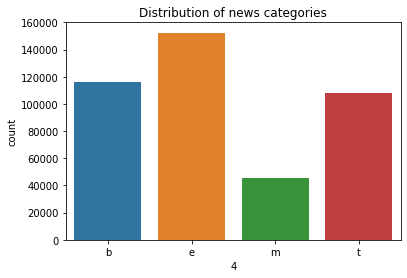

In [4]:
sns.countplot(x=data_df.iloc[:, 3], data=data_df)
plt.title('Distribution of news categories')

In [5]:
def data_processing(text):
    text = text.lower()
    text_tokens = word_tokenize(text)
    filtered_text = [word for word in text_tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_text]
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in stemmed_text]
    return " ".join(lemmatized_text)

In [38]:
X = data_df.iloc[:, 0].apply(data_processing)
Y = data_df.iloc[:, 3]


In [39]:
data = pd.DataFrame()
data['title'] = X
data['category'] = Y
data.category.replace({'b': 0, 't': 1, 'e': 2, 'm': 3}, inplace=True)
data['word_count'] = data['title'].apply(lambda x: len(str(x).split(" ")))
data.head()


,title,category,word_count
0,crude oil price mix asia trade,0,6
1,amazon launch shop via twitter,0,5
2,e-cigarett may help smoker quit,3,5
3,mortgag rate higher pre-ecb volatil ramp,0,6
4,best dress : men 's wearhous buy jo . a. bank ...,0,13


In [40]:
duplicate_count = data.duplicated().sum()
print("Number of duplicate rows: ", duplicate_count)

Number of duplicate rows:  21082


In [41]:
data = data.drop_duplicates('title')
data.shape

(400350, 3)

In [44]:
X = data['title']
Y = data['category']
vect = TfidfVectorizer()
X = vect.fit_transform(X)


In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(x_train)

  (0, 27655)	0.48076321917527315
  (0, 30520)	0.3242375328235348
  (0, 17332)	0.34757631158146407
  (0, 14247)	0.45607217672321304
  (0, 27000)	0.3516039480248609
  (0, 9040)	0.3438631030143442
  (0, 29438)	0.3050548422198675
  (1, 12372)	0.45204115453548194
  (1, 10706)	0.35342818893591355
  (1, 30222)	0.31741186949420597
  (1, 15343)	0.3517742007250846
  (1, 37654)	0.3035442211436519
  (1, 26168)	0.349130970848369
  (1, 26134)	0.33156561465013995
  (1, 29635)	0.3496922087587507
  (2, 30622)	0.4747498254210418
  (2, 14762)	0.4128848251988022
  (2, 23876)	0.4076339290452882
  (2, 21775)	0.3426629167509797
  (2, 26047)	0.3326756239385913
  (2, 17335)	0.4581291946548768
  (3, 12248)	0.43601713517469515
  (3, 14951)	0.3865882851362821
  (3, 25890)	0.4441334792133391
  (3, 6194)	0.35713386536486025
  :	:
  (320275, 37643)	0.2781701391094701
  (320276, 9626)	0.4976857614235863
  (320276, 16410)	0.42825404821493457
  (320276, 37406)	0.35728337528864007
  (320276, 20871)	0.3907132846524116
  

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [62]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
test_pred = mnb.predict(x_test)
acc = accuracy_score(y_test, test_pred)
print("Test accuracy: {:.2f}%".format(acc*100))

Test accuracy: 92.21%


In [57]:
# vali_pred = mnb.predict(x_val)
# acc = accuracy_score(y_val, vali_pred)
# print("Validation accuracy: {:.2f}%".format(acc*100))

Validation accuracy: 92.36%


In [64]:
print(classification_report(y_test, test_pred))
print('\n')
print(confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     22012
           1       0.90      0.90      0.90     20538
           2       0.95      0.97      0.96     28944
           3       0.96      0.84      0.90      8576

    accuracy                           0.92     80070
   macro avg       0.93      0.91      0.92     80070
weighted avg       0.92      0.92      0.92     80070



[[20116  1294   495   107]
 [ 1481 18456   520    81]
 [  390   438 28039    77]
 [  598   236   522  7220]]


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# cross_score = cross_val_score(mnb, x_train, y_train, cv=5)
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 5], 'fit_prior': [True, False]}
grid = GridSearchCV(mnb, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0.924 total time=   0.1s
[CV 2/5] END ........alpha=0.01, fit_prior=True;, score=0.922 total time=   0.1s
[CV 3/5] END ........alpha=0.01, fit_prior=True;, score=0.923 total time=   0.0s
[CV 4/5] END ........alpha=0.01, fit_prior=True;, score=0.924 total time=   0.0s
[CV 5/5] END ........alpha=0.01, fit_prior=True;, score=0.923 total time=   0.1s
[CV 1/5] END .......alpha=0.01, fit_prior=False;, score=0.923 total time=   0.0s
[CV 2/5] END .......alpha=0.01, fit_prior=False;, score=0.921 total time=   0.1s
[CV 3/5] END .......alpha=0.01, fit_prior=False;, score=0.921 total time=   0.1s
[CV 4/5] END .......alpha=0.01, fit_prior=False;, score=0.923 total time=   0.1s
[CV 5/5] END .......alpha=0.01, fit_prior=False;, score=0.923 total time=   0.0s
[CV 1/5] END .........alpha=0.1, fit_prior=True;, score=0.927 total time=   0.1s
[CV 2/5] END .........alpha=0.1, fit_prior=True;

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 5],
                         'fit_prior': [True, False]},
             verbose=3)

In [67]:
print("best cross-validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross-validation score: 0.93
best parameters:  {'alpha': 0.1, 'fit_prior': True}


In [68]:
mnb = MultinomialNB(alpha=0.01, fit_prior=True)
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(y_test, mnb_pred)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 92.37%


In [69]:
print(classification_report(y_test, mnb_pred))
print('\n')
print(confusion_matrix(y_test, mnb_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     22012
           1       0.90      0.90      0.90     20538
           2       0.95      0.97      0.96     28944
           3       0.95      0.88      0.91      8576

    accuracy                           0.92     80070
   macro avg       0.92      0.91      0.92     80070
weighted avg       0.92      0.92      0.92     80070



[[20029  1312   484   187]
 [ 1509 18429   479   121]
 [  397   479 27962   106]
 [  449   197   390  7540]]
